**Bank Churn Prediction**

In [63]:
####################################################################
#PROJECT NAME: Bank Churn Prediction                               #    
#                                                                  #
#                                                                  #                    
#PROGRAM NAME: Bank Churn Prediction_NN_project                    #  
#AUTHOR:     Kevin Kluck                                           #
#DATE:       10/12/2020                                            #
#                                                                  #
#Python Version:3.7.6                                              #      
#                                                                  #
#                                                                  #         
#ABSTRACT:Given a Bank customer, build a neural network-based      #
#         classifier that can determine whether they               #
#          will leave or not.                                      #
#                                                                  #
####################################################################

In [76]:
####################################################################
##                                                                ##
##                   Import Libraries                             ##
##                                                                ##
###################################################################

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
import warnings
from PIL import Image
from scipy.stats import zscore
import os
from sklearn.impute import SimpleImputer
import seaborn as sns
%matplotlib inline
from matplotlib import cm




import warnings
warnings.filterwarnings("ignore")

In [65]:
from google.colab import files

In [66]:
################### Up load csv file from my computer #################
uploaded = files.upload()

Saving bank.csv to bank (1).csv


I would like to thank Tarun Sunkaraneni, from Kaggle, for putting together this data set.

In [67]:
##############################
##                          ##
##      Import Data         ##
##                          ##
##############################
import io
df = pd.read_csv(io.BytesIO(uploaded['bank.csv']))



############# python formating ##################
extra = {'Bold': '\x1b[1m',
        'Underline': '\x1b[4m',
        'Blue': '\x1b[94m',
        'End': '\x1b[0m'}

############## Set seed   #############
seed = 1729

In [68]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Perform univariate analysis

In [69]:
print(extra['Bold'],extra['Blue'],extra['Underline'],"\nData Types")
print("\n")
print(extra['End'],df.dtypes)

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nShape")
print("\n")
print(extra['End'],df.shape)

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nNumber of Missing Values per Column")
print("\n")
print(extra['End'],df.isnull().sum())

print(extra['Bold'],extra['Blue'],extra['Underline'],"\nNumber of Unique Values per Column")
print("\n")
print(extra['End'],df.nunique())

   
Data Types


 RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object
   
Shape


 (10000, 14)
   
Number of Missing Values per Column


 RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
   
Number of Unique Values per Column


 RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   7

Drop the columns which are unique for all users like IDs 

In [ ]:
drop_colums = ['CustomerId','RowNumber', 'Surname']
data = df.drop(columns=drop_colums)

Distinguish the features and target variable 

In [70]:
print(extra['Bold'],extra['Blue'],extra['Underline'],"\nStatistical Summary")
print(extra['End'])
U_df = pd.concat([data.describe().T, data.skew()], axis=1)
U_df.rename(columns={0:"Skewed"}, inplace=True)
U_df.sort_values(by = "Skewed")

   
Statistical Summary



,count,mean,std,min,25%,50%,75%,max,Skewed
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00,-0.901812
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09,-0.141109
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00,-0.071607
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00,-0.060437
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48,0.002085
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00,0.010991
NumOfProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.745568
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00,1.011320
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00,1.471611


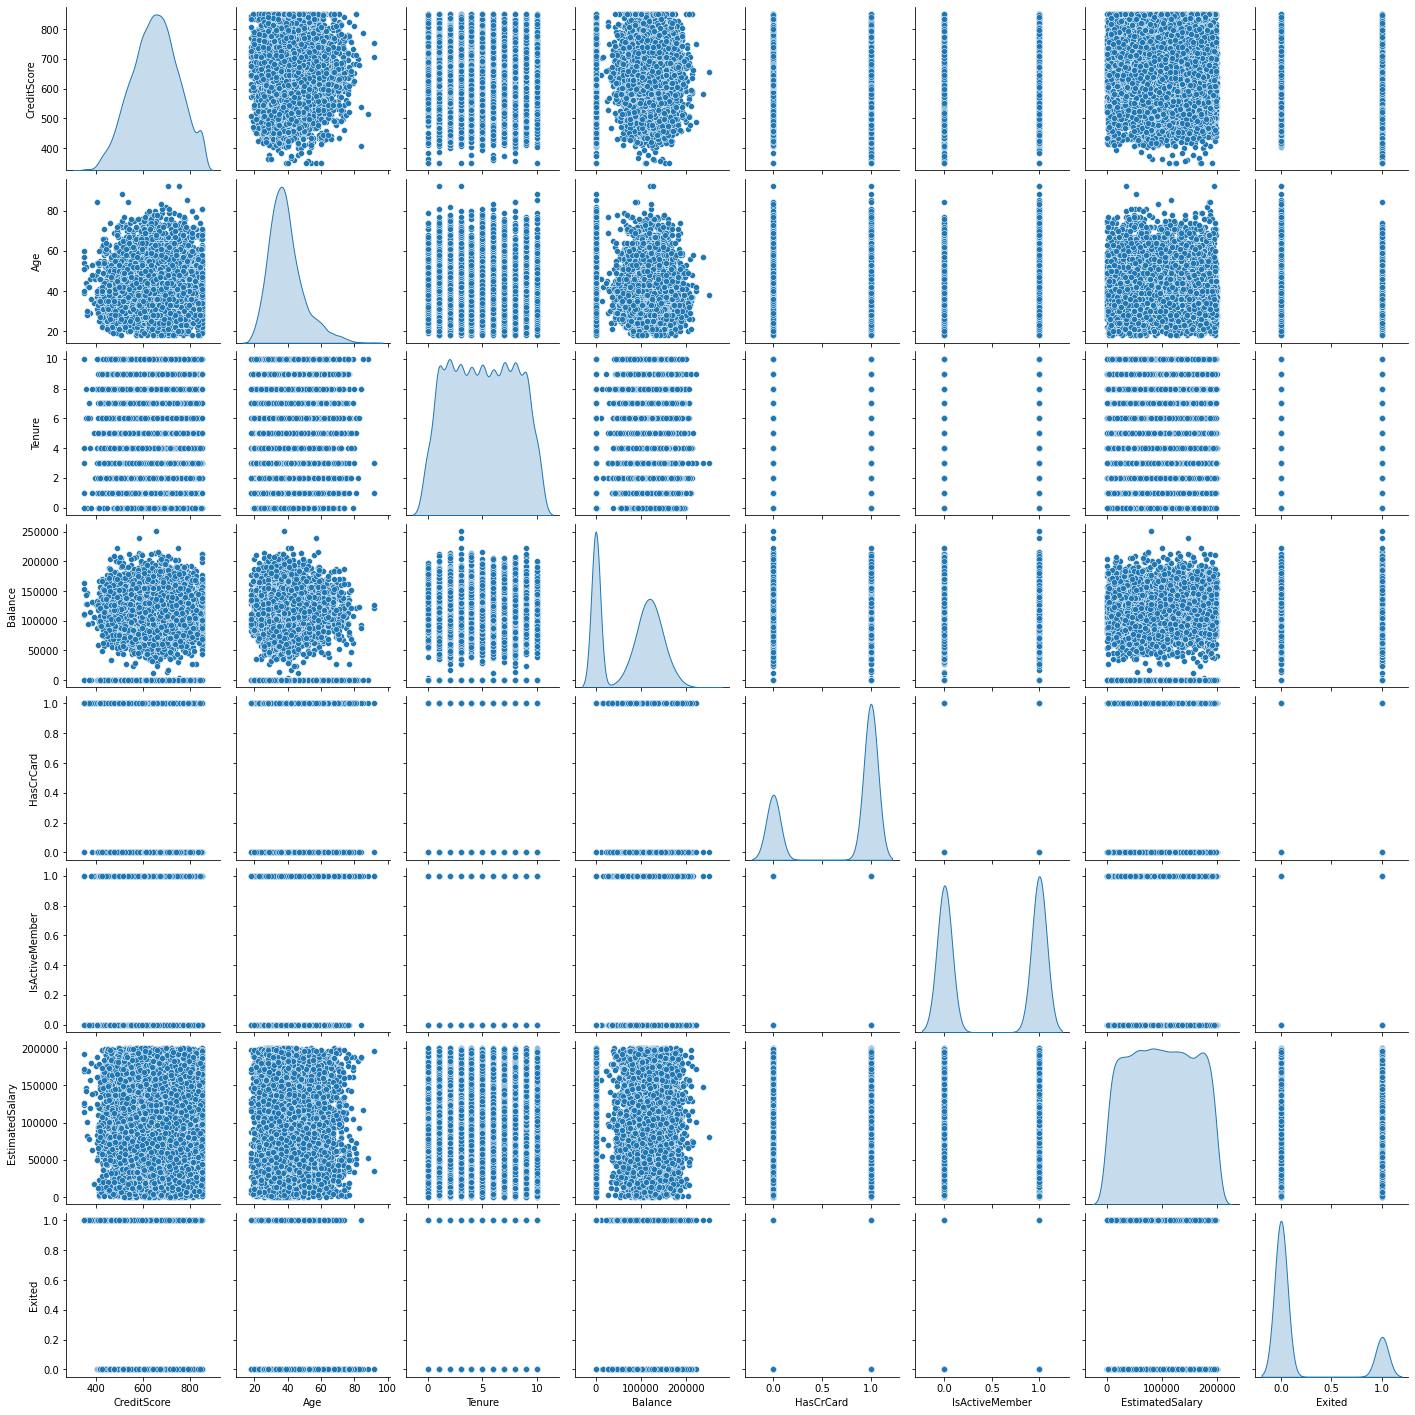

In [71]:
# Visulize distribution
sns.pairplot(data , diag_kind = 'kde')
plt.show()

In [72]:
############## Look at the objective variables #################
def charts(a,b):
    var =round(data[a].value_counts(normalize=True).sort_values(ascending = False)*100,1)
    print(extra['Underline'],b.ljust(50,' '), "% Percentage",extra['End'],"\n")
    for a, count in var.iteritems():
        print(a.ljust(52, " "), count)
    print("\n")
    return

charts('Gender', 'Gender')
charts('Geography', 'Geography')

 Gender                                             % Percentage  

Male                                                 54.6
Female                                               45.4


 Geography                                          % Percentage  

France                                               50.1
Germany                                              25.1
Spain                                                24.8




Credit Score is the customers current credit score.

Geography, which we will split into two variables, represents clients location, either France, Germany, or Spain.

Gender is the client gender.

Age is the clients age.

Tenure is how long the client been with the bank.

Balance is the clients balance.

NumOfProducts is number of products used with the bank.

HasCrCard, is if the client has bank credit card.

IsActiveMember member is active or not.

ExtimatedSalary is the client estimated salary.

Exited is the target variable.

In [73]:
data["NumOfProducts"]= data["NumOfProducts"].astype(str) # Change objective variables into dummy variables that are numeric
# Change number of products to objective since there is only four categories, or different values
df2 = pd.get_dummies(data, columns=['Gender', 'Geography', 'NumOfProducts'])
df2=df2.drop(columns = ['Geography_Germany', 'Gender_Female', 'NumOfProducts_1'])#make femal default and Germany default
df2.head().T

,0,1,2,3,4
CreditScore,619.00,608.00,502.00,699.00,850.00
Age,42.00,41.00,42.00,39.00,43.00
Tenure,2.00,1.00,8.00,1.00,2.00
Balance,0.00,83807.86,159660.80,0.00,125510.82
HasCrCard,1.00,0.00,1.00,0.00,1.00
IsActiveMember,1.00,1.00,0.00,0.00,1.00
EstimatedSalary,101348.88,112542.58,113931.57,93826.63,79084.10
Exited,1.00,0.00,1.00,0.00,0.00
Gender_Male,0.00,0.00,0.00,0.00,0.00
Geography_France,1.00,0.00,1.00,1.00,0.00


Divide the data set into training and test sets 

In [77]:
#Split the data into training and test set in the ratio of 70:30 respectively. The target variable is Target.
from sklearn.model_selection import train_test_split
X = df2.drop('Exited',axis=1)
Y = df2['Exited']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

Normalize the train and test data

In [78]:
# normalize non binary variables
keep_these = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
x_train_z  =x_train[keep_these]


x_train_score = x_train_z.apply(zscore)
#x_train[keep_these] = x_train_score[keep_these]


x_test_z  =x_test[keep_these]


x_test_score = x_test_z.apply(zscore)
x_test[keep_these] = x_test_score[keep_these]


In [79]:
x_train = x_train.astype('float') 
x_test = x_test.astype('float') 
y_train = y_train.astype('float') 
y_test = y_test.astype('float') 

Initialize & build the model. Identify the points of improvement and implement the same.

In [80]:
################# Import tensorflow package ##################
import tensorflow as tf
import tensorflow.keras.layers as L

In [81]:
model = tf.keras.models.Sequential([L.Dense(32, activation='relu', input_shape = (13,)),
                                  L.Dense(16, activation='tanh'),
                                  L.Dense(1, activation='sigmoid')]) # input shape has to do with how many features are in the x_train data

In [82]:
optimizer = tf.keras.optimizers.Adam(lr = 0.01)

In [83]:
loss = tf.keras.losses.BinaryCrossentropy()

In [84]:
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['accuracy'])

In [85]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [86]:
model.fit(x_train,
          y_train,
          batch_size=128, 
          epochs=5,
          verbose = 1,          
          validation_data=(x_test, y_test))

Epoch 1/5
55/55 [==============================] - 0s 5ms/step - loss: 0.5150 - accuracy: 0.7943 - val_loss: 0.6680 - val_accuracy: 0.6160
Epoch 2/5
55/55 [==============================] - 0s 3ms/step - loss: 0.5012 - accuracy: 0.7971 - val_loss: 0.5829 - val_accuracy: 0.7700
Epoch 3/5
55/55 [==============================] - 0s 3ms/step - loss: 0.4989 - accuracy: 0.7971 - val_loss: 0.5624 - val_accuracy: 0.7863
Epoch 4/5
55/55 [==============================] - 0s 5ms/step - loss: 0.5010 - accuracy: 0.7971 - val_loss: 0.5325 - val_accuracy: 0.7940
Epoch 5/5
55/55 [==============================] - 0s 3ms/step - loss: 0.5010 - accuracy: 0.7971 - val_loss: 0.5177 - val_accuracy: 0.7947


I could chose a smaller learning rate to make val_loss smaller and accuracy higher. Also I could chose a higher value for epochs.

In [87]:
optimizer = tf.keras.optimizers.Adam(lr = 0.001)

In [88]:
model.compile(optimizer=optimizer,
             loss=loss,
             metrics=['accuracy'])

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.fit(x_train,
          y_train,
          batch_size=128, 
          epochs=10,
          verbose = 1,          
          validation_data=(x_test, y_test))

Epoch 1/10
55/55 [==============================] - 0s 6ms/step - loss: 0.5000 - accuracy: 0.7971 - val_loss: 0.5138 - val_accuracy: 0.7947
Epoch 2/10
55/55 [==============================] - 0s 3ms/step - loss: 0.4998 - accuracy: 0.7971 - val_loss: 0.5138 - val_accuracy: 0.7947
Epoch 3/10
55/55 [==============================] - 0s 3ms/step - loss: 0.4997 - accuracy: 0.7971 - val_loss: 0.5154 - val_accuracy: 0.7947
Epoch 4/10
55/55 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7971 - val_loss: 0.5134 - val_accuracy: 0.7947
Epoch 5/10
55/55 [==============================] - 0s 3ms/step - loss: 0.4991 - accuracy: 0.7971 - val_loss: 0.5128 - val_accuracy: 0.7950
Epoch 6/10
55/55 [==============================] - 0s 3ms/step - loss: 0.5005 - accuracy: 0.7971 - val_loss: 0.5104 - val_accuracy: 0.7950
Epoch 7/10
55/55 [==============================] - 0s 3ms/step - loss: 0.5021 - accuracy: 0.7971 - val_loss: 0.5112 - val_accuracy: 0.7950
Epoch 8/10
55/55 [==

In [94]:
history = model.fit(x_train,
          y_train,
          batch_size=128, 
          epochs=50,
          verbose = 1,
         validation_data=(x_test, y_test))

Epoch 1/50
55/55 [==============================] - 0s 4ms/step - loss: 0.5072 - accuracy: 0.7971 - val_loss: 0.5177 - val_accuracy: 0.7937
Epoch 2/50
55/55 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7971 - val_loss: 0.5294 - val_accuracy: 0.7943
Epoch 3/50
55/55 [==============================] - 0s 3ms/step - loss: 0.4995 - accuracy: 0.7971 - val_loss: 0.5326 - val_accuracy: 0.7940
Epoch 4/50
55/55 [==============================] - 0s 3ms/step - loss: 0.4987 - accuracy: 0.7971 - val_loss: 0.5390 - val_accuracy: 0.7940
Epoch 5/50
55/55 [==============================] - 0s 3ms/step - loss: 0.4983 - accuracy: 0.7971 - val_loss: 0.5393 - val_accuracy: 0.7933
Epoch 6/50
55/55 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.7971 - val_loss: 0.5452 - val_accuracy: 0.7937
Epoch 7/50
55/55 [==============================] - 0s 3ms/step - loss: 0.4981 - accuracy: 0.7971 - val_loss: 0.5455 - val_accuracy: 0.7937
Epoch 8/50
55/55 [==

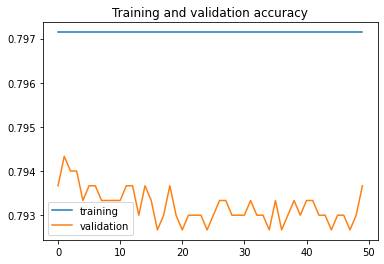

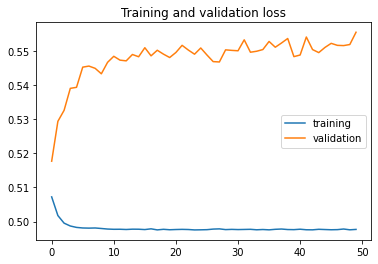

In [95]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs


plt.plot  ( epochs,     acc ,label='training')
plt.plot  ( epochs, val_acc,label='validation' )
plt.title ('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot  ( epochs,     loss , label='training')
plt.plot  ( epochs, val_loss , label='validation')
plt.title ('Training and validation loss'   )
plt.legend()
plt.show()

Predict the results using 0.5 as the threshold

In [96]:
from sklearn.metrics import confusion_matrix, precision_score, roc_auc_score,accuracy_score



In [97]:
y_predict = model.predict(x_test) # these are probabilities

In [98]:

y_predict_c = np.where(y_predict >= 0.5, 1, 0)

In [99]:
y_predict_c # predicted values

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [100]:
print("Roc Auc Score:        ",roc_auc_score(y_test,y_predict_c))

Roc Auc Score:         0.5019825737548044


Print the Accuracy Score and confusion matrix

Confusion Matrix



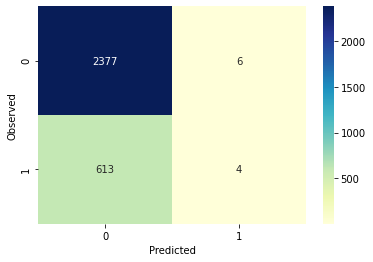

None


In [101]:
################ Make Confusion Matrix ##################
def confusion( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [0,1] , yticklabels = [0,1] , cmap="YlGnBu")
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

print('Confusion Matrix')
print()
print(confusion(y_test,y_predict_c))


In [102]:
print('Accuracy of test data is', round(val_acc[49]*100,2), 'percent.')

Accuracy of test data is 79.37 percent.
